<a href="https://colab.research.google.com/github/maelemonides/mvp_analysis/blob/main/nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) On scrap les données de BBref, ici pour notre analyse j'ai choisi d'extraire les données avancées des joueurs. En effet, d'après mon expérience, choisir des données trop simple n'est pas très intéressant : il est difficile de tirer des conclusions et de créer des liens entre les données**

In [ ]:
!pip install jupyter_dash
!pip install dash
import requests 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import sys
from google.colab import drive
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
drive.mount('/content/drive')

def get_stats(year):

  #Initialize data set
  data = []
  url = (f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html')
  # The requests library can send a GET request to the url
  res = requests.get(url)
  # BeautifulSoup library parses the content of an HTML document, in this case res
  soup = BeautifulSoup(res.content, 'lxml') 
  per_game = soup.find(name = 'table', attrs = {'id' : 'advanced_stats'})

  for row in per_game.find_all('tr')[1:]:  # Excluding the first 'tr', because it's the table's title head
      player = {}
      try:
        player['Name'] = row.find('td', {'data-stat' : 'player'}).text.strip()
        player['Age'] = row.find('td', {'data-stat' : 'age'}).text.strip()
        player['Minutes Played'] = row.find('td', {'data-stat' : 'mp'}).text.strip()
        player['Games'] = row.find('td', {'data-stat' : 'g'}).text.strip()
        player['Player Efficiency Rating'] = row.find('td', {'data-stat' : 'per'}).text.strip()
        player['True Shooting Percentage'] = row.find('td', {'data-stat' : 'ts_pct'}).text.strip()
        player['Free Throw Rate'] = row.find('td', {'data-stat' : 'fta_per_fga_pct'}).text.strip()
        player['Offensive Rebound Percentage'] = row.find('td', {'data-stat' : 'orb_pct'}).text.strip()
        player['Defensive Rebound Percentage'] = row.find('td', {'data-stat' : 'drb_pct'}).text.strip()
        player['Total Rebound Percentage'] = row.find('td', {'data-stat' : 'trb_pct'}).text.strip()
        player['Assist Percentage'] = row.find('td', {'data-stat' : 'ast_pct'}).text.strip()
        player['Steal Percentage'] = row.find('td', {'data-stat' : 'stl_pct'}).text.strip()
        player['Block Percentage'] = row.find('td', {'data-stat' : 'blk_pct'}).text.strip()
        player['Turnover Percentage'] = row.find('td', {'data-stat' : 'tov_pct'}).text.strip()
        player['Usage Percentage'] = row.find('td', {'data-stat' : 'usg_pct'}).text.strip()
        player['Offensive Win Shares'] = row.find('td', {'data-stat' : 'ows'}).text.strip()
        player['Defensive win Shares'] = row.find('td', {'data-stat' : 'dws'}).text.strip()
        player['Win Shares'] = row.find('td', {'data-stat' : 'ws'}).text.strip()
        player['Win Shares per 48'] = row.find('td', {'data-stat' : 'ws_per_48'}).text.strip()
        player['Usage Percentage'] = row.find('td', {'data-stat' : 'usg_pct'}).text.strip()
        player['Defensive BPM'] = row.find('td', {'data-stat' : 'dbpm'}).text.strip()
        player['Offensive BPM'] = row.find('td', {'data-stat' : 'obpm'}).text.strip()
        player['BPM'] = row.find('td', {'data-stat' : 'bpm'}).text.strip()
        player['Value over replacement player'] = row.find('td', {'data-stat' : 'vorp'}).text.strip()
      except Exception as e :
        continue
      data.append(player)

  df = pd.DataFrame(data)
  return df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.0 MB/s 
     |████████████████████████████████| 357 kB 33.3 MB/s 
     |████████████████████████████████| 1.6 MB 33.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8037fe922b2bda2bab4471b8a856bc6bcb4abd08a91a552258403977df88e913
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  from ipykernel import kernelapp as app


Mounted at /content/drive


**J'extrais maintenant les statistiques des joueurs qui ont reçu un vote de MVP et je joins les deux tables dans une nouvelle table**



In [ ]:
all_nba = get_stats(2022)
mvp = pd.read_excel('/content/drive/MyDrive/sportsref_download.xlsx')
mvp = pd.merge(all_nba, mvp, how='inner')


**Voici la table qu'on obtient**

In [ ]:
mvp

,Name,Age,Minutes Played,Games,Player Efficiency Rating,True Shooting Percentage,Free Throw Rate,Offensive Rebound Percentage,Defensive Rebound Percentage,Total Rebound Percentage,...,Usage Percentage,Offensive Win Shares,Defensive win Shares,Win Shares,Win Shares per 48,Defensive BPM,Offensive BPM,BPM,Value over replacement player,Share
0,Giannis Antetokounmpo,27,2204,67,32.1,.633,.615,6.6,30.4,18.7,...,34.9,9.2,3.7,12.9,.281,3.5,7.6,11.2,7.4,0.595
1,Devin Booker,25,2345,68,21.3,.576,.255,2.1,13.2,7.8,...,32.0,4.3,3.3,7.6,.156,0.2,3.9,4.1,3.6,0.216
2,Stephen Curry,33,2211,64,21.4,.601,.243,1.7,14.4,8.3,...,30.8,4.6,3.4,8.0,.173,0.4,5.4,5.8,4.4,0.004
3,DeMar DeRozan,32,2743,76,23.1,.590,.386,2.3,13.7,8.0,...,31.8,7.0,1.8,8.8,.154,-0.9,3.4,2.5,3.1,0.001
4,Luka Dončić,22,2301,65,25.1,.571,.349,2.7,26.0,14.3,...,37.4,3.8,3.8,7.6,.159,1.8,6.4,8.2,5.9,0.146
5,Kevin Durant,33,2047,55,25.6,.634,.367,1.6,19.6,10.8,...,31.2,6.4,2.0,8.4,.198,0.7,6.4,7.2,4.8,0.001
6,Joel Embiid,27,2297,68,31.2,.616,.602,7.2,31.1,19.4,...,37.2,7.9,4.1,12.0,.252,2.0,7.2,9.2,6.5,0.706
7,LeBron James,37,2084,56,26.2,.619,.275,3.3,20.4,11.8,...,32.3,5.2,2.3,7.5,.172,0.8,6.9,7.7,5.1,0.001
8,Nikola Jokić,26,2476,74,32.8,.661,.357,9.6,35.5,23.0,...,31.9,10.8,4.5,15.2,.296,4.5,9.2,13.7,9.8,0.875
9,Ja Morant,22,1889,57,24.4,.575,.353,4.2,14.1,9.0,...,33.7,4.6,2.1,6.7,.171,-0.1,6.2,6.1,3.9,0.010


**Je crée une fonction pour changer le type en num des données pour pouvoir les utiliser et les comparer**

In [ ]:
# Function changes all object columns that should be numeric to an int or float
def obj_to_num(nba_df):
    
    str_cols = ['Name']
    
    for i in nba_df.columns:
        if i not in str_cols:
            nba_df[i] = pd.to_numeric(nba_df[i])
    
    print(nba_df.dtypes)

obj_to_num(all_nba)
obj_to_num(mvp)

Name                              object
Age                                int64
Minutes Played                     int64
Games                              int64
Player Efficiency Rating         float64
True Shooting Percentage         float64
Free Throw Rate                  float64
Offensive Rebound Percentage     float64
Defensive Rebound Percentage     float64
Total Rebound Percentage         float64
Assist Percentage                float64
Steal Percentage                 float64
Block Percentage                 float64
Turnover Percentage              float64
Usage Percentage                 float64
Offensive Win Shares             float64
Defensive win Shares             float64
Win Shares                       float64
Win Shares per 48                float64
Defensive BPM                    float64
Offensive BPM                    float64
BPM                              float64
Value over replacement player    float64
dtype: object
Name                              object
Ag

**Vue de la table all_nba**

In [ ]:
all_nba

,Name,Age,Minutes Played,Games,Player Efficiency Rating,True Shooting Percentage,Free Throw Rate,Offensive Rebound Percentage,Defensive Rebound Percentage,Total Rebound Percentage,...,Turnover Percentage,Usage Percentage,Offensive Win Shares,Defensive win Shares,Win Shares,Win Shares per 48,Defensive BPM,Offensive BPM,BPM,Value over replacement player
0,Precious Achiuwa,22,1725,73,12.7,0.503,0.217,8.7,21.7,14.9,...,11.3,18.5,0.4,2.1,2.5,0.070,-0.6,-2.0,-2.6,-0.2
1,Steven Adams,28,1999,76,17.6,0.560,0.518,17.9,22.0,19.9,...,19.6,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0
2,Bam Adebayo,24,1825,56,21.8,0.608,0.466,8.7,26.1,17.5,...,14.4,25.0,3.6,3.5,7.2,0.188,2.1,1.7,3.8,2.7
3,Santi Aldama,21,360,32,10.2,0.452,0.242,9.4,16.1,12.6,...,9.9,18.4,-0.1,0.4,0.3,0.044,-1.5,-4.2,-5.7,-0.3
4,LaMarcus Aldridge,36,1050,47,19.6,0.604,0.223,7.8,18.7,13.4,...,8.0,22.4,2.1,1.0,3.1,0.141,-0.6,1.3,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,33,475,26,15.8,0.526,0.188,8.7,18.1,13.1,...,12.4,16.0,0.5,0.8,1.3,0.127,2.2,-0.2,2.0,0.5
808,Trae Young,23,2652,76,25.4,0.603,0.358,2.1,9.6,5.9,...,14.5,34.4,9.0,1.0,10.0,0.181,-2.0,7.1,5.2,4.8
809,Omer Yurtseven,23,706,56,17.4,0.546,0.247,13.9,33.0,23.6,...,13.0,19.9,0.8,1.4,2.1,0.145,0.4,-1.4,-1.0,0.2
810,Cody Zeller,29,355,27,17.2,0.627,0.544,14.9,24.1,19.3,...,14.6,15.9,0.9,0.2,1.1,0.143,-1.0,-1.2,-2.1,0.0


**Je crée une heatmap de corrélation afin d'avoir une idée comment axé mon analyse de données**

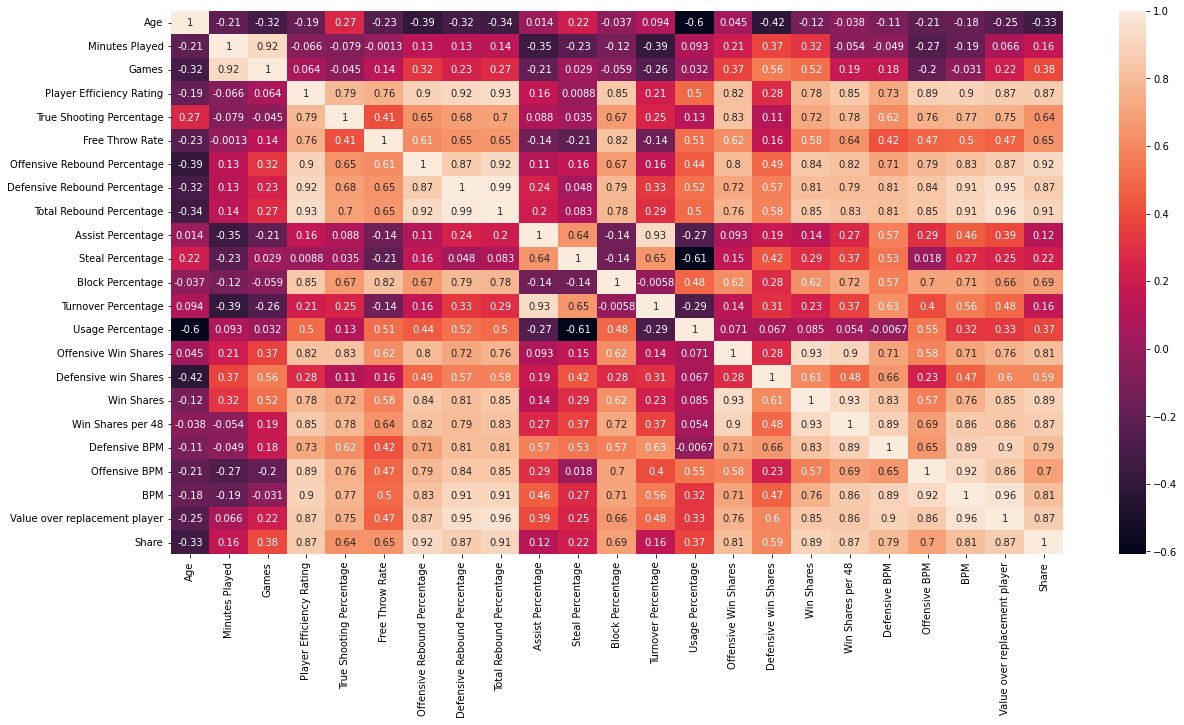

In [ ]:
corr = mvp.iloc[:,:].corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax =ax)

**Nous réalisons, sans grande surprise, que les stats positives sont hautement corrélées avec le vote share pour le MVP. Cependant, nous remarquons aussi que les stats négatives ne sont pas si impactantes, notamment le Turnover percentage, de plus les statistiques dites "non avancées", elles non plus, ne donnent pas de lien de corrélation net.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

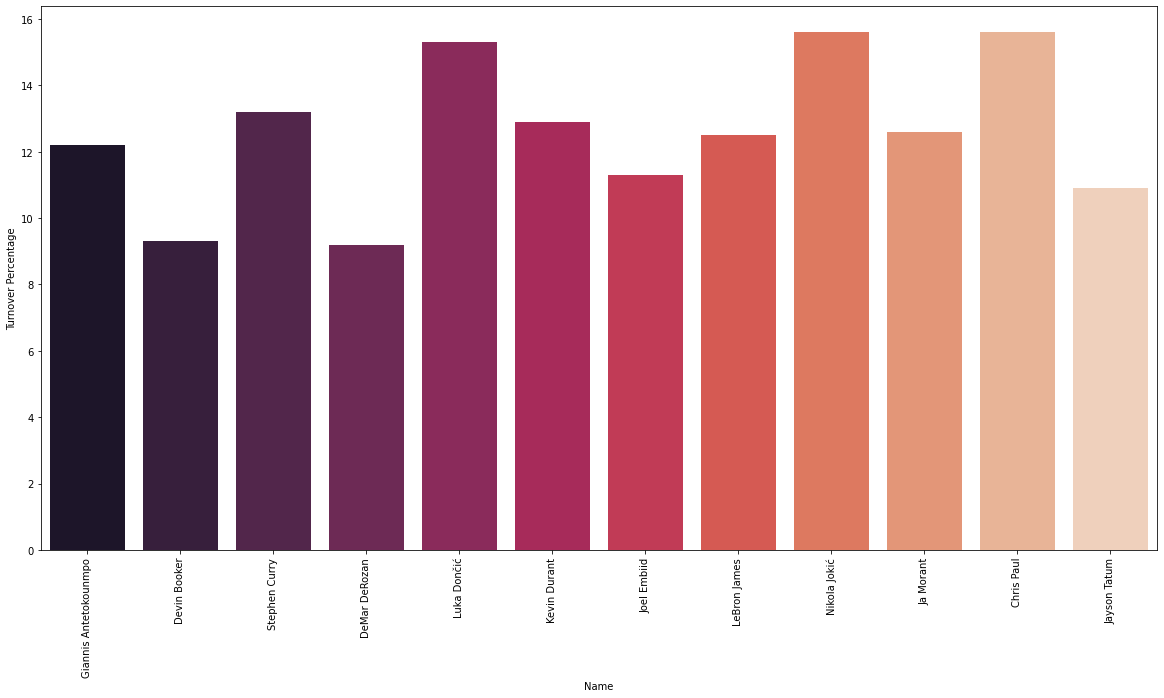

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=mvp, x='Name', y='Turnover Percentage', palette = 'rocket')
plt.xticks(rotation=90)

**Cela se voit directement : Jokic est le joueur qui a reçu le plus de vote et pourtant il est le joueur avec le pire Turnover Percentage.**

**Le PER (Player Efficiency Rating) est un classement par minute développé par John Hollinger, chroniqueur à ESPN.com. Selon John, "le PER additionne tous les accomplissements positifs d'un joueur, soustrait les accomplissements négatifs et renvoie une évaluation par minute de la performance du joueur". Il semble, d'après ses livres, que la base de données de John ne remonte qu'à la saison 1988-89. Il est intéressant parce qu'il va regrouper de nombreuses données du joueur. Notamment les rebonds, steals etc... c'est pour cela que l'on voit une haute corrélation sur ces statistiques. Créons une boîte à moustache sur le PER afin de voir quels sont les joueurs les plus "efficient" selon cette statistique**

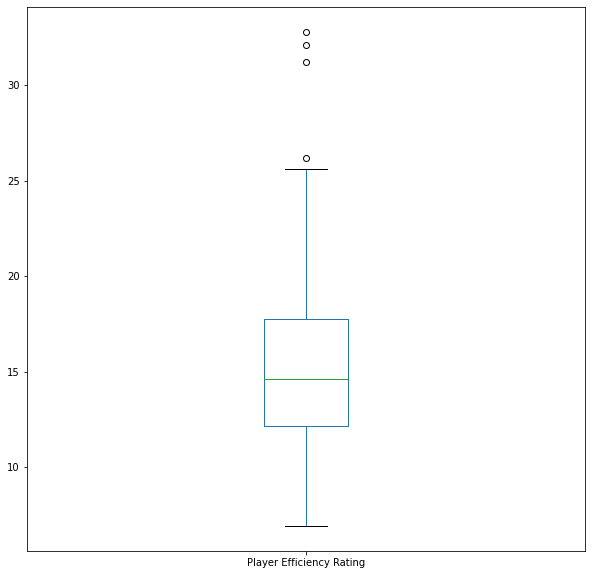

In [ ]:
ax = plt.subplots(figsize=(10,10))
all_nba[(all_nba['Minutes Played'] >= 1000)].boxplot(column =['Player Efficiency Rating'], grid = False)

**Regardons les joueurs qui "sortent du lot", nous avons de la chance, cela correspond aux meilleurs joueurs de la NBA !**


In [ ]:
all_nba[(all_nba['Minutes Played'] >= 1000)].sort_values(by=['Player Efficiency Rating'], ascending=False).head(5)

,Name,Age,Minutes Played,Games,Player Efficiency Rating,True Shooting Percentage,Free Throw Rate,Offensive Rebound Percentage,Defensive Rebound Percentage,Total Rebound Percentage,...,Turnover Percentage,Usage Percentage,Offensive Win Shares,Defensive win Shares,Win Shares,Win Shares per 48,Defensive BPM,Offensive BPM,BPM,Value over replacement player
391,Nikola Jokić,26,2476,74,32.8,0.661,0.357,9.6,35.5,23.0,...,15.6,31.9,10.8,4.5,15.2,0.296,4.5,9.2,13.7,9.8
15,Giannis Antetokounmpo,27,2204,67,32.1,0.633,0.615,6.6,30.4,18.7,...,12.2,34.9,9.2,3.7,12.9,0.281,3.5,7.6,11.2,7.4
206,Joel Embiid,27,2297,68,31.2,0.616,0.602,7.2,31.1,19.4,...,11.3,37.2,7.9,4.1,12.0,0.252,2.0,7.2,9.2,6.5
368,LeBron James,37,2084,56,26.2,0.619,0.275,3.3,20.4,11.8,...,12.5,32.3,5.2,2.3,7.5,0.172,0.8,6.9,7.7,5.1
198,Kevin Durant,33,2047,55,25.6,0.634,0.367,1.6,19.6,10.8,...,12.9,31.2,6.4,2.0,8.4,0.198,0.7,6.4,7.2,4.8


**De la même manière, on s'attend à voir les joueurs avec le plus de Win Shares être dans le top des votes MVP. Pour cela je crée une app Dash intéractive**

In [ ]:
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H4('Win Shares per Total Games Played'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by win shares:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=15.5, step=0.5,
        marks={0: '0', 15.5: '15.5'},
        value=[0, 15.5]
    ),
])
# Define callback to update graph
@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = all_nba # replace with your own data source
    low, high = slider_range
    mask = (all_nba['Win Shares'] > low) & (df['Win Shares'] < high)
    fig = px.scatter(
        df[mask], x="Win Shares", y="Games", 
        color="Win Shares", size='Win Shares', 
        hover_data=['Name'])
    return fig
# Run app and display result inline in the notebook
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

**On y retrouve de nouveau Jokic, Antetokounmpo et Embiid. On y retrouve cependant aussi, notre français Rudy Gobert (élu plusieurs fois meilleur défenseur de la NBA). Rappelons-nous de notre table de corrélation : le Defensive Win share n'est que faiblement relié au Vote Share comparé à l'Offensive Win Share**